# Функции и библиотеки

In [12]:
from graphlib.structures import Graph
import graphlib.algorithms as alg
import graphlib.tools as tls

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(0)

# Загрузка данных, количество ребер и вершин; плотность

In [13]:
%%time

G = Graph('CO-Astro')
with open('./datasets/CA-AstroPh.txt', mode='r') as f:
    for line in f:
        u, v = line.split()
        G.add_edge(u, v)
print(G)

print('Плотность графа: ', tls.density(G))

Граф <CO-Astro> с 18772 вершинами and 198110 ребрами
Плотность графа:  1.0095452503419835e-05
Wall time: 502 ms


# Количество компонент связности, характеристики наибольшей компоненты

In [14]:
%%time

number, largest_index, components = alg.DFS_with_cc(G, largest=True)
largest_component = G.subgraph(nodes=components[largest_index])

Wall time: 162 ms


In [15]:
print(f'Количество компонент связности - {number}')
print(f'Наибольшая компонента связности: {largest_component.nodes_count} вершин и {largest_component.edges_count} ребер',)

Количество компонент связности - 290
Наибольшая компонента связности: 17903 вершин и 197031 ребер


In [16]:
nodes_in_largest_component = largest_component.nodes
print(f'Доля вершин в наибольшей компоненте слабой связности: {round(largest_component.nodes_count / G.nodes_count, 3)}')

Доля вершин в наибольшей компоненте слабой связности: 0.954


## Доля вершин в текущей компоненте слабой связности при удалении x% случайных вершин

Wall time: 96 ms


Text(0, 0.5, 'Доля вершин в наибольшей компоненте')

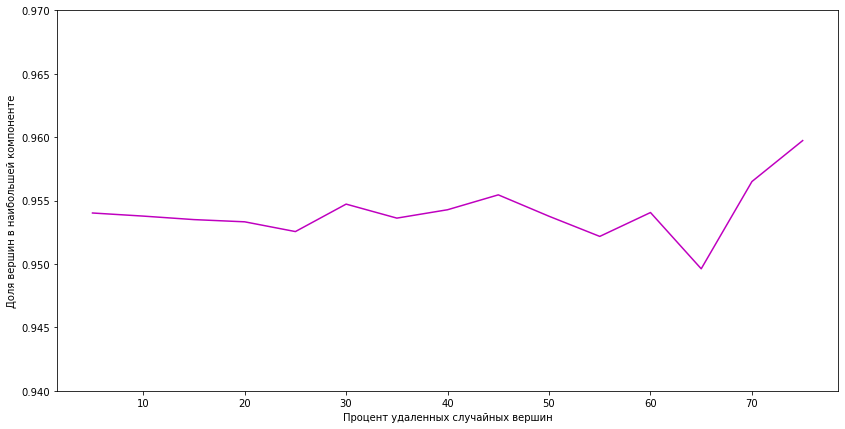

In [17]:
%%time

procent_of_removing = np.arange(5, 80, 5) # от 5 до 75 с шагом 5
props = []
for x in procent_of_removing:
    n = round(G.nodes_count * (x/100)) # число удаляемых вершин
    removing_nodes = G.selection(x=n,
                                 most_degree=False)
    tmp_set = nodes_in_largest_component - removing_nodes
    proportion = len(tmp_set) / (G.nodes_count-n)
    props.append(proportion)
    

plt.figure(figsize=(14, 7))
plt.plot(procent_of_removing, props, 'm')
plt.ylim(0.94, 0.97)
plt.xlabel('Процент удаленных случайных вершин')
plt.ylabel('Доля вершин в наибольшей компоненте')

## Доля вершин в новой наибольшей компоненте слабой связности при удалении x% случайных вершин

Text(0, 0.5, 'Доля вершин в наибольшей компоненте')

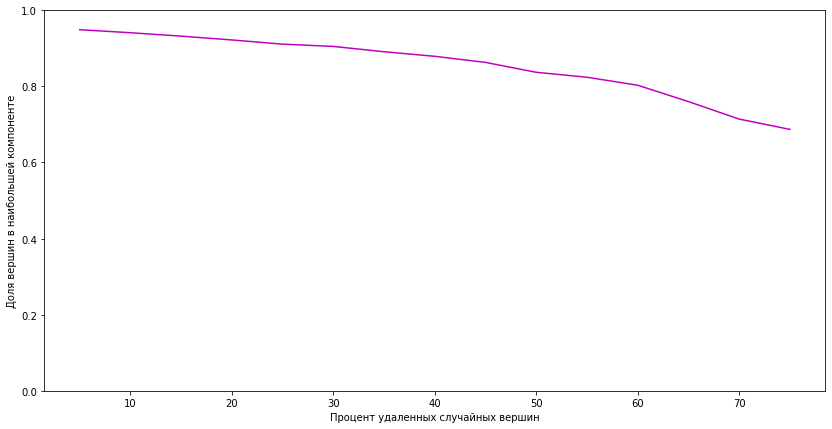

In [18]:
procent_of_removing = np.arange(5, 80, 5) # от 5 до 75 с шагом 5
props = []
for x in procent_of_removing:
    # удаление вершин
    n = round(G.nodes_count * (x/100))
    removing_nodes = G.selection(x=n,
                                 most_degree=False)
    tmp_set = G.nodes - removing_nodes
    
    # выделение новой компоненты
    G_after_removing = G.subgraph(nodes=tmp_set)
    _, largest_i, cc = alg.DFS_with_cc(G_after_removing, largest=True)
    largest_c = G_after_removing.subgraph(nodes=cc[largest_i])
    
    # подсчет доли
    proportion = round(largest_c.nodes_count / G_after_removing.nodes_count, 3)
    props.append(proportion)

plt.figure(figsize=(14, 7))
plt.plot(procent_of_removing, props, 'm')
plt.ylim(0, 1)
plt.xlabel('Процент удаленных случайных вершин')
plt.ylabel('Доля вершин в наибольшей компоненте')

## Доля вершин в текущей компоненте слабой связности при удалении x% вершин наибольшей степени

Wall time: 216 ms


Text(0, 0.5, 'Доля вершин в наибольшей компоненте')

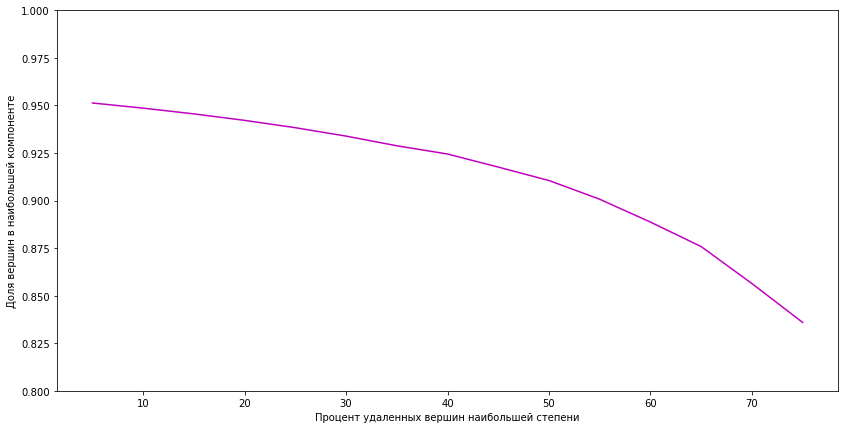

In [19]:
%%time

procent_of_removing = np.arange(5, 80, 5) # от 5 до 75 с шагом 5
props = []
for x in procent_of_removing:
    n = round(G.nodes_count * (x/100)) # число удаляемых вершин
    removing_nodes = G.selection(x=n,
                                 most_degree=True)
    tmp_set = nodes_in_largest_component - removing_nodes
    proportion = len(tmp_set) / (G.nodes_count-n)
    props.append(proportion)
    

plt.figure(figsize=(14, 7))
plt.plot(procent_of_removing, props, 'm')
plt.ylim(0.8, 1)
plt.xlabel('Процент удаленных вершин наибольшей степени')
plt.ylabel('Доля вершин в наибольшей компоненте')

## Доля вершин в новой наибольшей компоненте слабой связности при удалении x%   вершин наибольшей степени

Text(0, 0.5, 'Доля вершин в наибольшей компоненте')

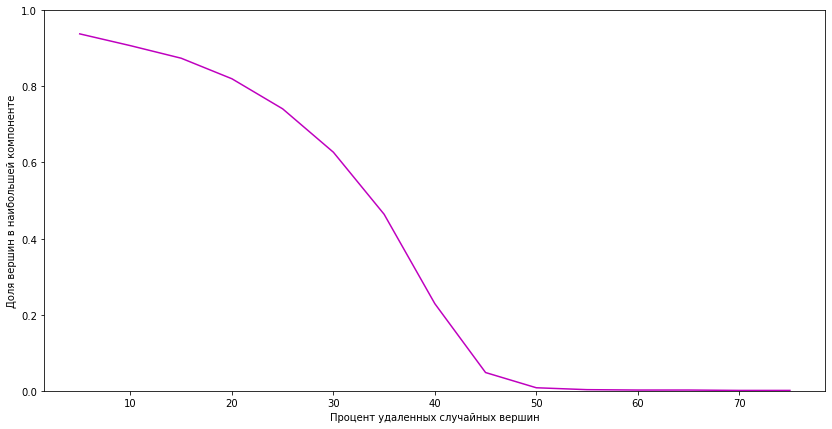

In [20]:
procent_of_removing = np.arange(5, 80, 5) # от 5 до 75 с шагом 5
props = []
for x in procent_of_removing:
    # удаление вершин
    n = round(G.nodes_count * (x/100))
    removing_nodes = G.selection(x=n,
                                 most_degree=True)
    tmp_set = G.nodes - removing_nodes
    
    # выделение новой компоненты
    G_after_removing = G.subgraph(nodes=tmp_set)
    _, largest_i, cc = alg.DFS_with_cc(G_after_removing, largest=True)
    largest_c = G_after_removing.subgraph(nodes=cc[largest_i])
    
    # подсчет доли
    proportion = round(largest_c.nodes_count / G_after_removing.nodes_count, 3)
    props.append(proportion)

plt.figure(figsize=(14, 7))
plt.plot(procent_of_removing, props, 'm')
plt.ylim(0, 1)
plt.xlabel('Процент удаленных случайных вершин')
plt.ylabel('Доля вершин в наибольшей компоненте')

# Метрические характеристики графа: диаметр, радиус и 90 процентиль (approximation)

In [ ]:
%%time

diam = diameter_approximate(graph=largest_component,
                            number=500)

In [9]:
#print(f'Диаметр наибольшей компоненты (приближенно): {diam}')

Диаметр наибольшей компоненты (приближенно): 11
Wall time: 1h 27s


In [ ]:
%%time

radius = radius_approximate(graph=largest_component,
                            number=500)

In [10]:
#print(f'Радиус наибольшей компоненты (приближенно): {radius}')

Радиус наибольшей компоненты (приближенно): 7
Wall time: 1h 55min


In [ ]:
%%time

percentile = geodesic_percentile_approximate(graph=largest_component,
                                             number=500,
                                             percent=90)

In [5]:
print(f'Диаметр наибольшей компоненты (приближенно): {diam}')
print(f'Радиус наибольшей компоненты (приближенно): {radius}')
print(f'90% процентиль геодезического расстояния в наибольшей компоненте (приближенно): {percentile}')

90% процентиль геодезического расстояния в наибольшей компоненте (приближенно): 5
Wall time: 5h 29min 21s


# Функция вероятности для степени узла в графе
Минимальная, максимальная, средняя степень узла в графе. Надо построить функцию вероятности (можно в виде гистограммы относительных частот)

In [22]:
%%time
degrees = list(map(lambda elem: elem[1], list(G.node_degrees())))
max_deg = max(degrees)
min_deg = min(degrees)
mean_deg = int(sum(degrees)/ len(degrees))

Wall time: 16 ms


In [23]:
print('Максимальная степень узла:', max(degrees))
print('Минимальная степень узла:', min(degrees))
print('Средняя степень узла:', int(sum(degrees)/len(degrees)))

Максимальная степень узла: 504
Минимальная степень узла: 1
Средняя степень узла: 21


Text(0, 0.5, 'Количество вершин')

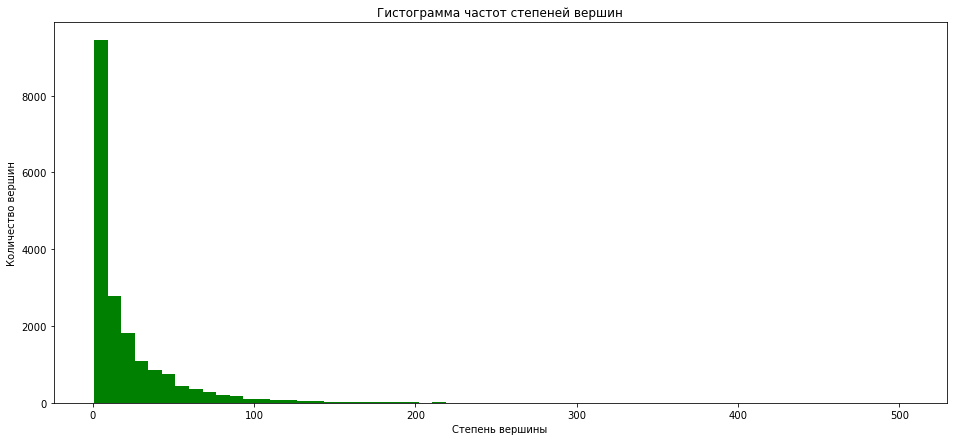

In [44]:
plt.figure(figsize=(16, 7))
plt.hist(np.array(degrees), bins=60, color='g')
plt.title('Гистограмма частот степеней вершин')
plt.xlabel('Степень вершины')
plt.ylabel('Количество вершин')

Text(0, 0.5, 'Вероятность')

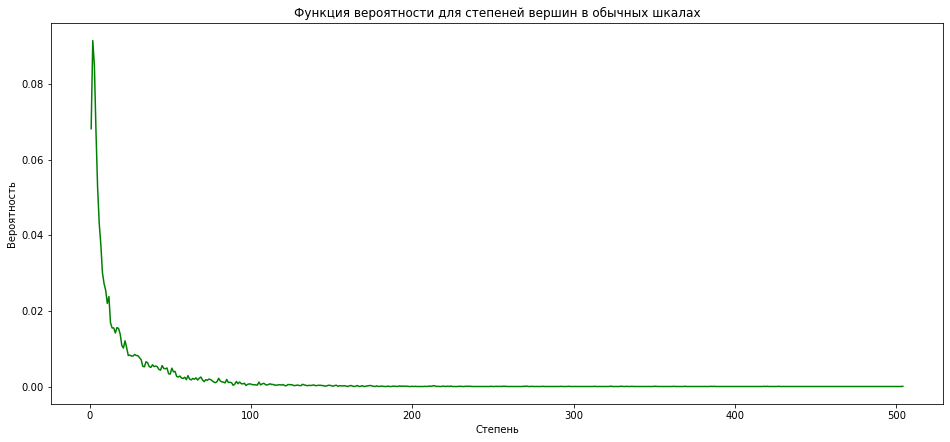

In [43]:
plt.figure(figsize=(16, 7))
x_axis = np.arange(1, 505)
y_axis = np.bincount(degrees) / G.nodes_count
y_axis = y_axis[1:] # не учитываем нулевую степень
plt.plot(x_axis, y_axis, c='g')

plt.title('Функция вероятности для степеней вершин в обычных шкалах')
plt.xlabel('Степень')
plt.ylabel('Вероятность')

Text(0, 0.5, 'Вероятность')

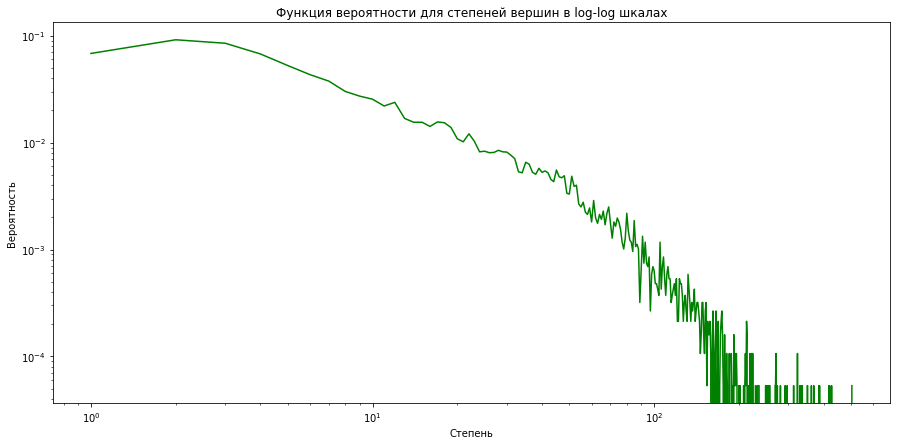

In [41]:
plt.figure(figsize=(15,7))
plt.loglog(x_axis, y_axis, c='g')
plt.title('Функция вероятности для степеней вершин в log-log шкалах')
plt.xlabel('Степень')
plt.ylabel('Вероятность')

# Число треугольников, глобальный и кластерный коэффициенты

In [3]:
%%time
n_of_triangles = number_of_triangles(G)

Wall time: 28.8 s


In [4]:
%%time
average_cluster_coef = average_clustering_coefficient(G)

Wall time: 23.3 s


In [5]:
%%time
global_cluster_coef = global_clustering_coefficient(G)

Wall time: 24.1 s


In [6]:
print(f'Число треугольников (K_3) в графе: {n_of_triangles}')
print(f'Средний кластерный коэффициент сети: {average_cluster_coef}')
print(f'Глобальный кластерный коэффициент сети: {global_cluster_coef}')

Число треугольников (K_3) в графе: 1351441
Средний кластерный коэффициент сети: 0.6305932411707957
Глобальный кластерный коэффициент сети: 0.3180015812533629
